In [1]:
import matplotlib.pyplot as plt
import cmocean.cm as cmo
import xarray as xr
import numpy as np
import mitgcm_assim.cost as cost

# Read all costfunction* files in current directory
ds = cost.read_costfunction('/data/SO3/edavenport/tpose6/sep2012/run_ad/')


In [2]:
ds.dataset

<xarray.DataArray 'dataset' (dataset: 30)> Size: 3kB
array(['HDO_TP_2012_CTD_w_prof_S', 'HDO_TP_2012_CTD_w_prof_T',
       'NODC_TP_2012_MRB_w_prof_S', 'NODC_TP_2012_MRB_w_prof_T',
       'SIO_TP_2012_XBT_w_prof_T', 'TAO_WO_2012_ADCP_prof_U',
       'TAO_WO_2012_ADCP_prof_V', 'TAO_WO_2012_CUR_prof_U',
       'TAO_WO_2012_CUR_prof_V', 'USGO_TP_2012_PFL_D_w_prof_S',
       'USGO_TP_2012_PFL_D_w_prof_T', 'WOD_TP_2012_GLD_w_prof_S',
       'WOD_TP_2012_GLD_w_prof_T', 'WOD_TP_2012_XBT_w_prof_T', 'fc',
       'sshv4-gfo', 'sshv4-mdt', 'sshv4-tp', 'sst-MW', 'xx_aqh', 'xx_atemp',
       'xx_lwdown', 'xx_precip', 'xx_salt', 'xx_swdown', 'xx_theta', 'xx_uvel',
       'xx_uwind', 'xx_vvel', 'xx_vwind'], dtype='<U27')
Coordinates:
  * dataset  (dataset) <U27 3kB 'HDO_TP_2012_CTD_w_prof_S' ... 'xx_vwind'

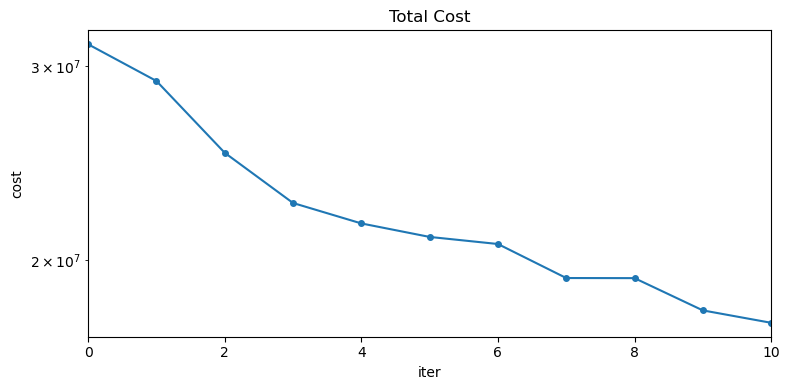

In [3]:
fig, ax = plt.subplots(figsize=(8, 4))
ds.cost.sel(dataset='fc').plot(marker='o',markersize=4,ax=ax)
ax.set_yscale('log')
ax.set_title('Total Cost')
ax.set_xlim(0,ds.iter.max())
plt.tight_layout()
fig.savefig('cost_function/total_cost.png')

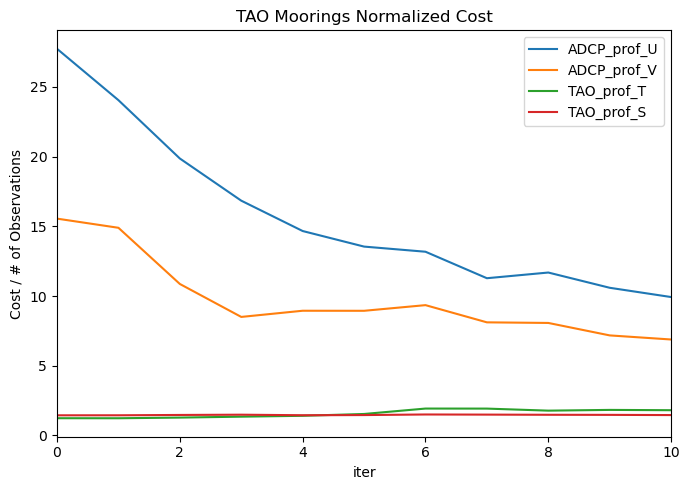

In [4]:
fig, ax = plt.subplots(figsize=(7, 5))
(ds.cost.sel(dataset='TAO_WO_2012_ADCP_prof_U')/ds.n_obs.sel(dataset='TAO_WO_2012_ADCP_prof_U')).plot(ax=ax,label='ADCP_prof_U')
(ds.cost.sel(dataset='TAO_WO_2012_ADCP_prof_V')/ds.n_obs.sel(dataset='TAO_WO_2012_ADCP_prof_V')).plot(ax=ax,label='ADCP_prof_V')
(ds.cost.sel(dataset='NODC_TP_2012_MRB_w_prof_T')/ds.n_obs.sel(dataset='NODC_TP_2012_MRB_w_prof_T')).plot(ax=ax,label='TAO_prof_T')
(ds.cost.sel(dataset='NODC_TP_2012_MRB_w_prof_S')/ds.n_obs.sel(dataset='NODC_TP_2012_MRB_w_prof_S')).plot(ax=ax,label='TAO_prof_S')
ax.set_title('TAO Moorings Normalized Cost')
ax.set_ylabel('Cost / # of Observations')
ax.legend()
ax.set_xlim(0,ds.iter.max())
plt.tight_layout()
fig.savefig('cost_function/TAO_mooring_cost.png')

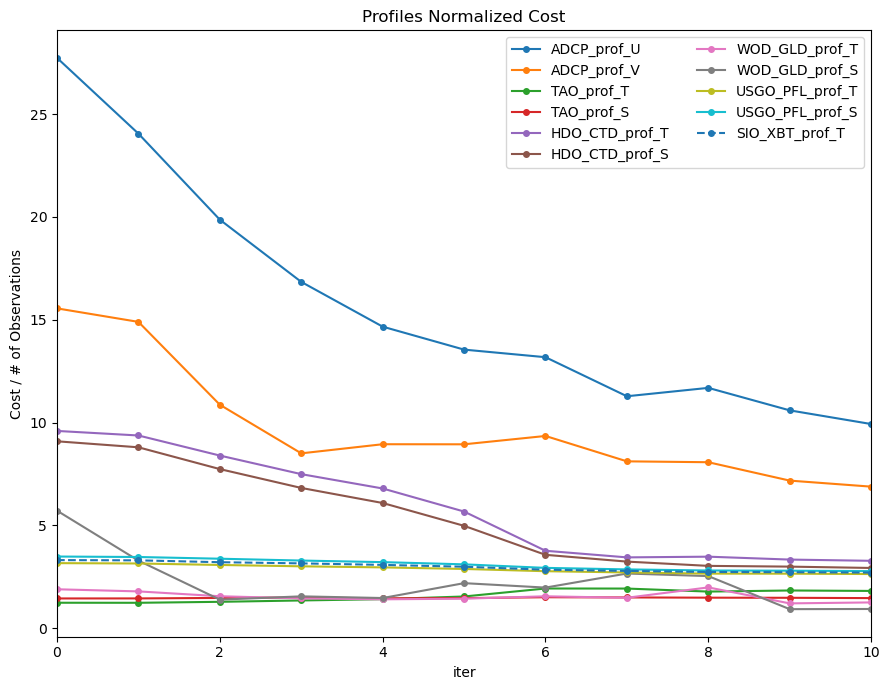

In [5]:
fig, ax = plt.subplots(figsize=(9, 7))
(ds.cost.sel(dataset='TAO_WO_2012_ADCP_prof_U')/ds.n_obs.sel(dataset='TAO_WO_2012_ADCP_prof_U')).plot(ax=ax,label='ADCP_prof_U',marker='o',markersize=4)
(ds.cost.sel(dataset='TAO_WO_2012_ADCP_prof_V')/ds.n_obs.sel(dataset='TAO_WO_2012_ADCP_prof_V')).plot(ax=ax,label='ADCP_prof_V',marker='o',markersize=4)
(ds.cost.sel(dataset='NODC_TP_2012_MRB_w_prof_T')/ds.n_obs.sel(dataset='NODC_TP_2012_MRB_w_prof_T')).plot(ax=ax,label='TAO_prof_T',marker='o',markersize=4)
(ds.cost.sel(dataset='NODC_TP_2012_MRB_w_prof_S')/ds.n_obs.sel(dataset='NODC_TP_2012_MRB_w_prof_S')).plot(ax=ax,label='TAO_prof_S',marker='o',markersize=4)
(ds.cost.sel(dataset='HDO_TP_2012_CTD_w_prof_T')/ds.n_obs.sel(dataset='HDO_TP_2012_CTD_w_prof_T')).plot(ax=ax,label='HDO_CTD_prof_T',marker='o',markersize=4)
(ds.cost.sel(dataset='HDO_TP_2012_CTD_w_prof_S')/ds.n_obs.sel(dataset='HDO_TP_2012_CTD_w_prof_S')).plot(ax=ax,label='HDO_CTD_prof_S',marker='o',markersize=4)
(ds.cost.sel(dataset='WOD_TP_2012_GLD_w_prof_T')/ds.n_obs.sel(dataset='WOD_TP_2012_GLD_w_prof_T')).plot(ax=ax,label='WOD_GLD_prof_T',marker='o',markersize=4)
(ds.cost.sel(dataset='WOD_TP_2012_GLD_w_prof_S')/ds.n_obs.sel(dataset='WOD_TP_2012_GLD_w_prof_S')).plot(ax=ax,label='WOD_GLD_prof_S',marker='o',markersize=4)
(ds.cost.sel(dataset='USGO_TP_2012_PFL_D_w_prof_T')/ds.n_obs.sel(dataset='USGO_TP_2012_PFL_D_w_prof_T')).plot(ax=ax,label='USGO_PFL_prof_T',marker='o',markersize=4)
(ds.cost.sel(dataset='USGO_TP_2012_PFL_D_w_prof_S')/ds.n_obs.sel(dataset='USGO_TP_2012_PFL_D_w_prof_S')).plot(ax=ax,label='USGO_PFL_prof_S',marker='o',markersize=4)
(ds.cost.sel(dataset='SIO_TP_2012_XBT_w_prof_T')/ds.n_obs.sel(dataset='SIO_TP_2012_XBT_w_prof_T')).plot(ax=ax,label='SIO_XBT_prof_T',linestyle='--',marker='o',markersize=4)
ax.set_title('Profiles Normalized Cost')
ax.set_ylabel('Cost / # of Observations')
ax.legend(ncol=2)
ax.set_xlim(0,ds.iter.max())
plt.tight_layout()
fig.savefig('cost_function/prof_cost.png')


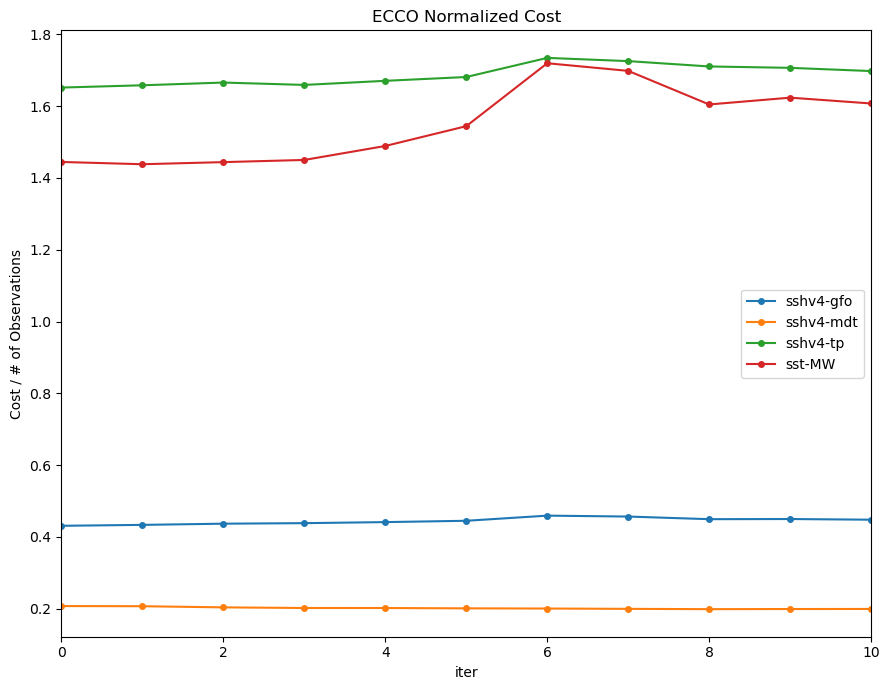

In [6]:
fig, ax = plt.subplots(figsize=(9, 7))
(ds.cost.sel(dataset='sshv4-gfo')/ds.n_obs.sel(dataset='sshv4-gfo')).plot(ax=ax,label='sshv4-gfo',marker='o',markersize=4)
(ds.cost.sel(dataset='sshv4-mdt')/ds.n_obs.sel(dataset='sshv4-mdt')).plot(ax=ax,label='sshv4-mdt',marker='o',markersize=4)
(ds.cost.sel(dataset='sshv4-tp')/ds.n_obs.sel(dataset='sshv4-tp')).plot(ax=ax,label='sshv4-tp',marker='o',markersize=4)
(ds.cost.sel(dataset='sst-MW')/ds.n_obs.sel(dataset='sst-MW')).plot(ax=ax,label='sst-MW',marker='o',markersize=4)
ax.set_title('ECCO Normalized Cost')
ax.legend()
ax.set_ylabel('Cost / # of Observations')
ax.set_xlim(0,ds.iter.max())
plt.tight_layout()
fig.savefig('cost_function/ecco_cost.png')

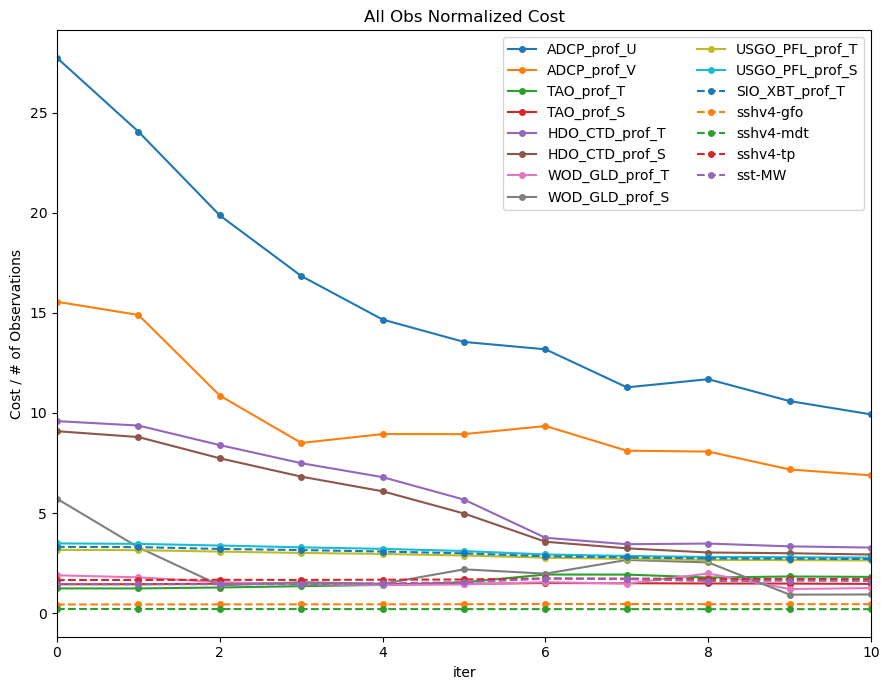

In [7]:
fig, ax = plt.subplots(figsize=(9, 7))
(ds.cost.sel(dataset='TAO_WO_2012_ADCP_prof_U')/ds.n_obs.sel(dataset='TAO_WO_2012_ADCP_prof_U')).plot(ax=ax,label='ADCP_prof_U',marker='o',markersize=4)
(ds.cost.sel(dataset='TAO_WO_2012_ADCP_prof_V')/ds.n_obs.sel(dataset='TAO_WO_2012_ADCP_prof_V')).plot(ax=ax,label='ADCP_prof_V',marker='o',markersize=4)
(ds.cost.sel(dataset='NODC_TP_2012_MRB_w_prof_T')/ds.n_obs.sel(dataset='NODC_TP_2012_MRB_w_prof_T')).plot(ax=ax,label='TAO_prof_T',marker='o',markersize=4)
(ds.cost.sel(dataset='NODC_TP_2012_MRB_w_prof_S')/ds.n_obs.sel(dataset='NODC_TP_2012_MRB_w_prof_S')).plot(ax=ax,label='TAO_prof_S',marker='o',markersize=4)
(ds.cost.sel(dataset='HDO_TP_2012_CTD_w_prof_T')/ds.n_obs.sel(dataset='HDO_TP_2012_CTD_w_prof_T')).plot(ax=ax,label='HDO_CTD_prof_T',marker='o',markersize=4)
(ds.cost.sel(dataset='HDO_TP_2012_CTD_w_prof_S')/ds.n_obs.sel(dataset='HDO_TP_2012_CTD_w_prof_S')).plot(ax=ax,label='HDO_CTD_prof_S',marker='o',markersize=4)
(ds.cost.sel(dataset='WOD_TP_2012_GLD_w_prof_T')/ds.n_obs.sel(dataset='WOD_TP_2012_GLD_w_prof_T')).plot(ax=ax,label='WOD_GLD_prof_T',marker='o',markersize=4)
(ds.cost.sel(dataset='WOD_TP_2012_GLD_w_prof_S')/ds.n_obs.sel(dataset='WOD_TP_2012_GLD_w_prof_S')).plot(ax=ax,label='WOD_GLD_prof_S',marker='o',markersize=4)
(ds.cost.sel(dataset='USGO_TP_2012_PFL_D_w_prof_T')/ds.n_obs.sel(dataset='USGO_TP_2012_PFL_D_w_prof_T')).plot(ax=ax,label='USGO_PFL_prof_T',marker='o',markersize=4)
(ds.cost.sel(dataset='USGO_TP_2012_PFL_D_w_prof_S')/ds.n_obs.sel(dataset='USGO_TP_2012_PFL_D_w_prof_S')).plot(ax=ax,label='USGO_PFL_prof_S',marker='o',markersize=4)
(ds.cost.sel(dataset='SIO_TP_2012_XBT_w_prof_T')/ds.n_obs.sel(dataset='SIO_TP_2012_XBT_w_prof_T')).plot(ax=ax,label='SIO_XBT_prof_T',linestyle='--',marker='o',markersize=4)
(ds.cost.sel(dataset='sshv4-gfo')/ds.n_obs.sel(dataset='sshv4-gfo')).plot(ax=ax,label='sshv4-gfo',linestyle='--',marker='o',markersize=4)
(ds.cost.sel(dataset='sshv4-mdt')/ds.n_obs.sel(dataset='sshv4-mdt')).plot(ax=ax,label='sshv4-mdt',linestyle='--',marker='o',markersize=4)
(ds.cost.sel(dataset='sshv4-tp')/ds.n_obs.sel(dataset='sshv4-tp')).plot(ax=ax,label='sshv4-tp',linestyle='--',marker='o',markersize=4)
(ds.cost.sel(dataset='sst-MW')/ds.n_obs.sel(dataset='sst-MW')).plot(ax=ax,label='sst-MW',linestyle='--',marker='o',markersize=4)
ax.set_title('All Obs Normalized Cost')
ax.set_ylabel('Cost / # of Observations')
ax.legend(ncol=2)
ax.set_xlim(0,ds.iter.max())
plt.tight_layout()
fig.savefig('cost_function/obs_cost.png')

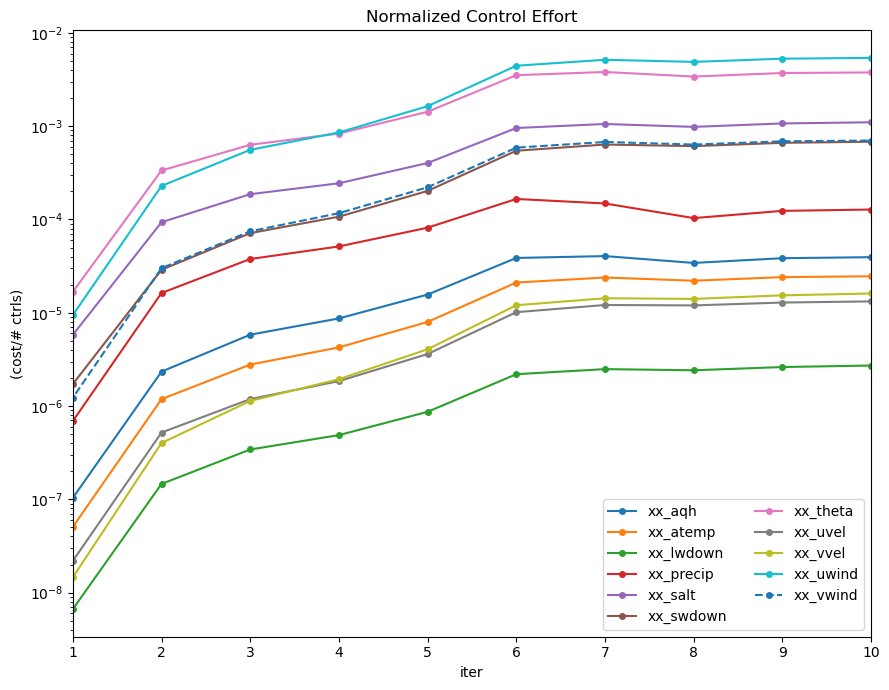

In [8]:
fig, ax = plt.subplots(figsize=(9, 7))
((ds.cost.sel(dataset='xx_aqh')/ds.n_obs.sel(dataset='xx_aqh'))).plot(ax=ax,label='xx_aqh',marker='o',markersize=4)
((ds.cost.sel(dataset='xx_atemp')/ds.n_obs.sel(dataset='xx_atemp'))).plot(ax=ax,label='xx_atemp',marker='o',markersize=4)
((ds.cost.sel(dataset='xx_lwdown')/ds.n_obs.sel(dataset='xx_lwdown'))).plot(ax=ax,label='xx_lwdown',marker='o',markersize=4)
((ds.cost.sel(dataset='xx_precip')/ds.n_obs.sel(dataset='xx_precip'))).plot(ax=ax,label='xx_precip',marker='o',markersize=4)
((ds.cost.sel(dataset='xx_salt')/ds.n_obs.sel(dataset='xx_salt'))).plot(ax=ax,label='xx_salt',marker='o',markersize=4)
((ds.cost.sel(dataset='xx_swdown')/ds.n_obs.sel(dataset='xx_swdown'))).plot(ax=ax,label='xx_swdown',marker='o',markersize=4)
((ds.cost.sel(dataset='xx_theta')/ds.n_obs.sel(dataset='xx_theta'))).plot(ax=ax,label='xx_theta',marker='o',markersize=4)
((ds.cost.sel(dataset='xx_uvel')/ds.n_obs.sel(dataset='xx_uvel'))).plot(ax=ax,label='xx_uvel',marker='o',markersize=4)
((ds.cost.sel(dataset='xx_vvel')/ds.n_obs.sel(dataset='xx_vvel'))).plot(ax=ax,label='xx_vvel',marker='o',markersize=4)
((ds.cost.sel(dataset='xx_uwind')/ds.n_obs.sel(dataset='xx_uwind'))).plot(ax=ax,label='xx_uwind',marker='o',markersize=4)
((ds.cost.sel(dataset='xx_vwind')/ds.n_obs.sel(dataset='xx_vwind'))).plot(ax=ax,label='xx_vwind',linestyle='--',marker='o',markersize=4)
ax.set_title('Normalized Control Effort')
ax.legend(ncol=2)
ax.set_yscale('log')
ax.set_xlim(1,ds.iter.max())
ax.set_ylabel('(cost/# ctrls)')
plt.tight_layout()
fig.savefig('cost_function/control_effort.png')